In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
dpi = 200


In [2]:
original_warp_params = np.asarray(pickle.load(open('output/warp_params.pkl', 'rb')))
original_frame_nums = pickle.load(open('output/frame_nums.pkl', 'rb'))
detected_frame_nums = pickle.load(open('output/detected_frame_numbers.pkl', 'rb'))

In [7]:
missed_frame_nums = list(set(detected_frame_nums).difference(set(original_frame_nums)))
missed_frame_nums.sort()

Text(0.5, 1.0, 'G02394_set2_struct_PNP-9200RH_00091852D428_cae7200f alignment')

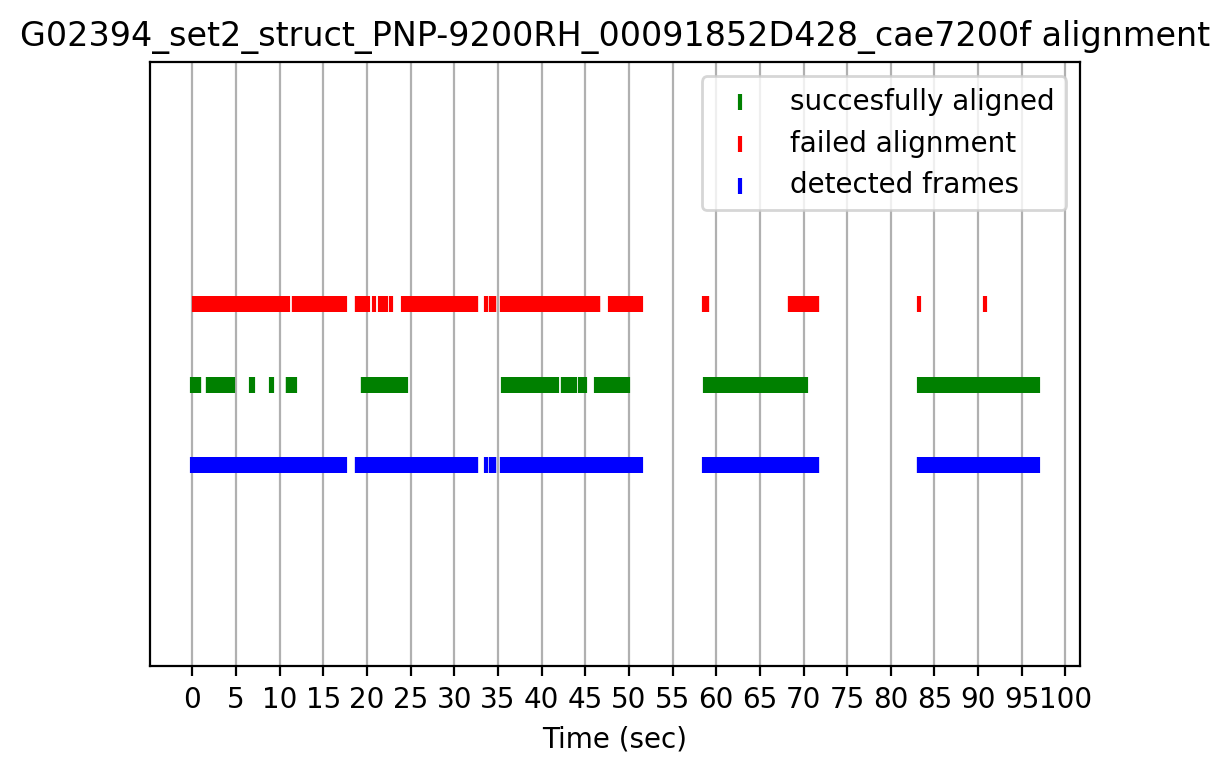

In [52]:
fig = plt.figure(facecolor='white', dpi=dpi)
ax = plt.gca()
ax.set_axisbelow(True)

offset = 0.01

plt.scatter(np.asarray(original_frame_nums) / 30, np.zeros(len(original_frame_nums))+offset, color='g',
            label='succesfully aligned', marker='|')
plt.scatter(np.asarray(missed_frame_nums) / 30, np.zeros(len(missed_frame_nums))+ 2* offset, color='r',
            label='failed alignment', marker='|')
plt.scatter(np.asarray(detected_frame_nums) / 30, np.zeros(len(detected_frame_nums)), color='b',
            label='detected frames', marker='|')
plt.ylim([-0.025, 0.05])
plt.legend()
plt.xticks(range(0, 101, 5))
plt.yticks([])
plt.grid()
plt.xlabel('Time (sec)')
plt.title('G02394_set2_struct_PNP-9200RH_00091852D428_cae7200f alignment')

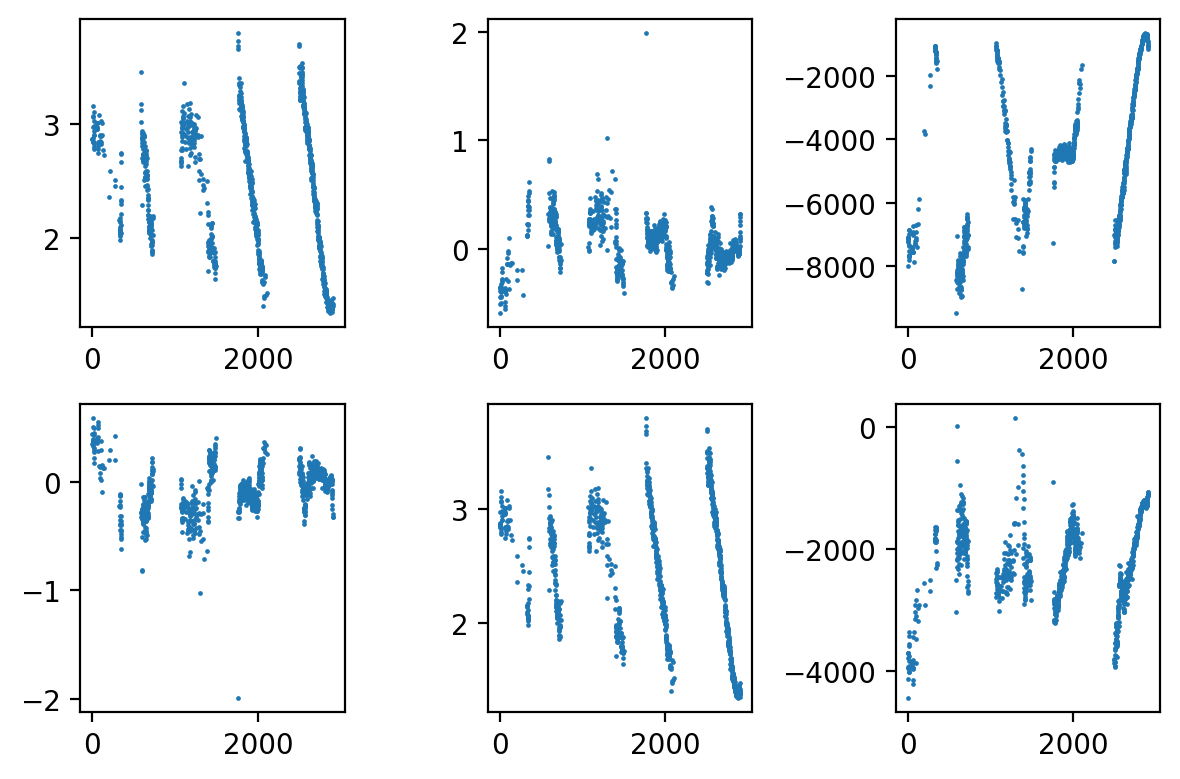

In [34]:
fig, ax = plt.subplots(2, 3, facecolor='white', dpi=dpi)

for ii in range(original_warp_params.shape[1]):
    for jj in range(original_warp_params.shape[2]):
        ax[ii, jj].scatter(original_frame_nums, original_warp_params[:, ii, jj], s=0.5)

fig.tight_layout()

In [18]:
np.asarray(original_warp_params).shape

(1086, 2, 3)